## What Gives a Country a Diverse Music Taste?

James McGhee, Neha Shijo, Varunika Tewani

## Introduction

New styles of music can originate and take hold anywhere, a phenomenon which has led to the creation of hundreds of new genres. People all around the world have different music taste, some local and others global, but some countries might have more homogeneous preferences than others. In our project we decided to investigate whether certain factors like number of incoming immigrants, median age, or size of a countries urban population, correlate with more diverse music taste in a country. Is lower median age an indicator of more diversity in the music of a country, since younger people might have broader music taste than their older counterparts? Do more incoming migrants to a country more unique music genres to that country as well? If a country has a higher urban population will they be exposed to more types of music, and thus have more diverse taste. 

Our project attempts to determine what genres of music are most popular in 34 countries around the world, and answer the question about: what factors might make a country have greater quantity and diversity of musical genre? 

## Data Collection

In order to answer this question, we used the following Kaggle dataset. It contains all of the songs from Spotify's Daily Top 200 charts in 35 countries from 2017 to 2020. The dataset contains 170633 rows and 151 fields, including Title, Artist, Album, Genre, and Country. 

Link: https://www.kaggle.com/pepepython/spotify-huge-database-daily-charts-over-3-years?select=Final+database.csv

We also used the following Kaggle dataset which contains information about countries population and several other characterisitics(including number of incoming immigrants, median age, or size of a countries urban population), ranging over the years 1995-2020. 

Link: https://www.kaggle.com/themlphdstudent/countries-population-from-1955-to-2020

First, we import the necessary packages and read in our dataset, which is located in a CSV file. 

In [26]:
# Used to create treemap of song genres
!pip install squarify 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('Final_database.csv')
df

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country,Uri,Popularity,Title,Artist,...,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,...,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,...,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,...,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,...,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,...,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,...,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,...,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,...,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,...,0,174,0.0,0.0,english speaking and nordic


Since 151 columns can be cumbersome to read, let's keep only the necessary columns for a visually cleaner table.

In [28]:
df = df[['Country', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Album']]
df

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album
0,Global,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
1,USA,8.00,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
2,Argentina,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
3,Belgium,849.60,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
4,Switzerland,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
...,...,...,...,...,...,...,...,...
170628,Taiwan,31.20,smalltown,Luke Christopher,single,indie pop rap,152740,SmallTown
170629,Taiwan,156.00,灰狼,G.E.M.,album,mandopop,1.22541e+06,摩天動物園
170630,Taiwan,90.40,預念患者,張赫宣,album,n-a,38,Freedom
170631,Taiwan,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875,有吉他的流行歌曲


Next, let's run some basic preliminary statistics on the dataset. Out of 170633 songs we have 47045 unique songs, 25524 unique artists, 34696 unique albums, 1120 unique genres and 34 unique countries. 

In [29]:
print(len(pd.unique(df['Title'])))

print(len(pd.unique(df['Artist'])))

print(len(pd.unique(df['Album'])))

print(len(pd.unique(df['Genre'])))

print(len(pd.unique(df['Country'])))

print(pd.unique(df['Country']))

47045
25524
34696
1120
35
['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']


## Data Visualization and Analysis

Next, let's try making some graphs on measures of the data.

First, a bar chart of the distribution of songs among countries. We'll make an auxiliary dataframe to store the number of songs per country, and plot it in decreasing order. After plotting, it looks like the countries which have the most "Spotify's Daily Top 200" songs in the data set are Switzerland, Taiwan, Sweden, Germany and Finland, with 7686, 7594, 6970, 6942 and 6783 songs each. In contrast, Ecuador, Peru, Philippines, Mexico, and Costa Rice are least represented, with 2660, 2701, 2806, 2833, and 2975 songs each. 

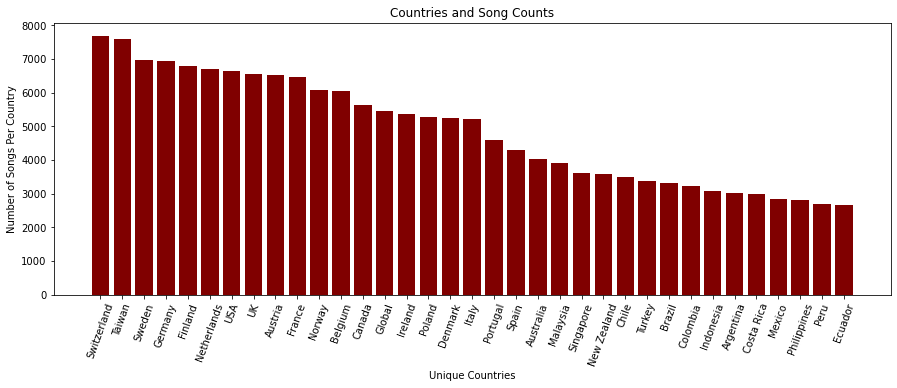

In [30]:
song_count = df.groupby(['Country']).size()

countries = pd.DataFrame({'Country':song_count.index, 'Song Count':song_count.values})

countries = countries.sort_values(by=['Song Count'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(countries['Country'], countries['Song Count'], color ='maroon', linewidth='0.9')
 
plt.xlabel("Unique Countries")
plt.ylabel("Number of Songs Per Country")
plt.title("Countries and Song Counts")
plt.xticks(rotation = 70)
plt.show()

Now we'll make a treemap to show the distibution of songs among genres. In order to do this, we group the data set by genre in order to link each genre with a number of songs. We then drop the genre 'n-a', which is a null value, and sort by the number of songs in each genre. Lastly, we use Squarify to plot the visual. As we can see, the most popular genres are dance pop, latin, pop, k-pop, and german hip hop, with 25351, 7591, 7146, 4053, and 3834 songs in each genre. 

In [31]:
genre_count = df.groupby(['Genre']).size()

genre = pd.DataFrame({'Genre':genre_count.index, 'Count':genre_count.values})

genre = genre[genre.Genre != 'n-a']

genre = genre.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(150,150)) 

squarify.plot(sizes=genre['Count'], label=genre['Genre'][:50], alpha=.8,text_kwargs={'fontsize':80, 'wrap':True} )
plt.axis('off')
plt.show()

Now that we know what the most popular genres of music are, let's see how the number of songs per genre is distributed. From describing the dataset and creating a boxplot, it looks like the mean is 148.955317, the standard deviation is 902.533572, and the range varies from 1 as a minimum and 25351 as a maximum number of songs. 

              Count
count   1119.000000
mean     148.955317
std      902.533572
min        1.000000
25%        2.000000
50%        9.000000
75%       51.000000
max    25351.000000


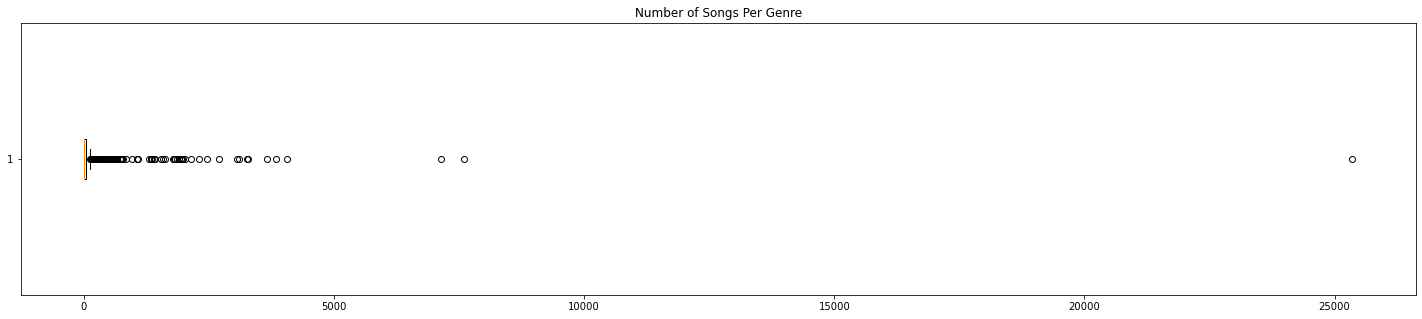

In [32]:
print(genre.describe())

plt.figure(figsize=(25,5)) 
plt.boxplot(genre['Count'], vert=False)

plt.title("Number of Songs Per Genre")

plt.show()

Let's move into analysis of the Artists appearing in this dataset. First, what is the distribution of followers per artist? Note that this dataset defines "Artist_followers" as the number of followers the artist had on Spotify on the 5th of November 2020. From the description and boxplot, we can see the mean is ~1755574 followers. The standard deviation is ~5412057, and the range varies from a minimum of 0 to a maximum of ~71783101 followers per artist. What are the most popular artists that have the greatest number of followers? Ed Sheeran, with 71783101 followers, Ariana Grande with 52571724 followers, Drake with 50593376 followers, Rihanna with 39741508 followers, and Justin Bieber with 39214943 followers. 

count       25506.000000
mean      1755574.172469
std       5412057.862621
min             0.000000
25%         24017.000000
50%        177318.000000
75%       1037761.000000
max      71783101.000000
Name: Artist_followers, dtype: object


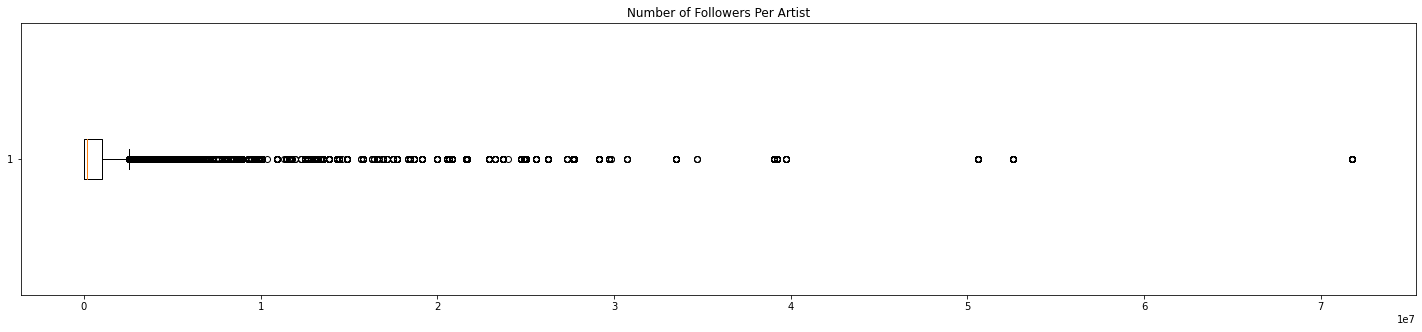

In [33]:
unique_artists = df.drop_duplicates(subset=['Artist'])

unique_artists = unique_artists.dropna(subset=['Artist_followers'])
unique_artists = unique_artists[unique_artists.Artist_followers != 'n-a']

unique_artists['Artist_followers'] = unique_artists['Artist_followers'].astype(float)

unique_artists = unique_artists.sort_values(by=['Artist_followers'], ascending=False)

print(unique_artists['Artist_followers'].describe().apply(lambda x: format(x, 'f')))

plt.figure(figsize=(25,5)) 
plt.boxplot(unique_artists['Artist_followers'], vert=False)

plt.title("Number of Followers Per Artist")

plt.show()

Now let's start working with our population dataset. Since the Spotify data ranges from 2017-2020, were going to filter out all other years from our data. The relevant variables we want to test are a Urban Population Percentage and Median Age so we'll keep those columns, along with Migrants (net) since we will need it to calculate a standardized "Immigrant Ratio" score. Instead of directly comparing the number of immigrants each country brings in, we will divide that number by the countries poulation to get a immigrant to citizen population ratio which we can compare between countries of different sizes. After dividing the Net number of Migrants by the Population, we scale the number up by a factor of 10000 just to make the scores more readable, and create a column of these new "Immigrant Ratio" scores. 

Note: The Immigrant Ratio for China, Inidia, Tokelau, and Holy See are all 0 because these countries had negative Net Migrants(More people left than came), so their numbers were artificially set to 0.

In [34]:
pop_df = pd.read_csv('Countries Population from 1995 to 2020.csv')

pop_df = pop_df[(pop_df['Year'] == 2017) | (pop_df['Year'] == 2018) | (pop_df['Year'] == 2019) | (pop_df['Year'] == 2020)]

pop_df = pop_df[['Year', 'Country', 'Population', 'Migrants (net)', 'Urban Pop %', 'Median Age']]

pop_df.loc[pop_df['Migrants (net)'] < 0, 'Migrants (net)'] = 0
pop_df.loc[pop_df['Migrants (net)'].isna(), 'Migrants (net)'] = 0

pop_df["Immigrant Ratio"] = pop_df["Migrants (net)"]*10000/pop_df["Population"]

pop_df


,Year,Country,Population,Migrants (net),Urban Pop %,Median Age,Immigrant Ratio
0,2020,China,1439323776,0.0,60.8,38.4,0.0
1,2019,China,1433783686,0.0,59.7,37.0,0.0
2,2018,China,1427647786,0.0,58.6,37.0,0.0
3,2017,China,1421021791,0.0,57.5,37.0,0.0
18,2020,India,1380004385,0.0,35.0,28.4,0.0
...,...,...,...,...,...,...,...
4162,2018,Tokelau,1319,0.0,0.0,NaN,0.0
4163,2017,Tokelau,1300,0.0,0.0,NaN,0.0
4178,2019,Holy See,799,0.0,NaN,NaN,0.0
4179,2018,Holy See,801,0.0,NaN,NaN,0.0


Now that we have both of our datasets and they have been cleaned, we are going to look at which countries are in both datasets.

In [35]:
print(str(len(pd.unique(df['Country']))) + " countries in the Spotify dataset: ")
print(pd.unique(df['Country']))

print(str(len(pd.unique(pop_df['Country']))) + " countries in the population dataset: ")
print(pd.unique(pop_df['Country']))

35 countries in the Spotify dataset: 
['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']
235 countries in the population dataset: 
['China' 'India' 'United States' 'Indonesia' 'Pakistan' 'Brazil' 'Nigeria'
 'Bangladesh' 'Russia' 'Mexico' 'Japan' 'Ethiopia' 'Philippines' 'Egypt'
 'Vietnam' 'DR Congo' 'Turkey' 'Iran' 'Germany' 'Thailand'
 'United Kingdom' 'France' 'Italy' 'Tanzania' 'South Africa' 'Myanmar'
 'Kenya' 'South Korea' 'Colombia' 'Spain' 'Uganda' 'Argentina' 'Algeria'
 'Sudan' 'Ukraine' 'Iraq' 'Afghanistan' 'Poland' 'Canada' 'Morocco'
 'Saudi Arabia' 'Uzbekistan' 'Peru' 'Angola' 'Malaysia' 'Mozambique'
 'Ghana' 'Yemen' 'Nepal' 'Venezuela' 'Madagascar' 'Cameroon'
 "Côte d'Ivo

Notice that in the Spotify dataset, United States and United Kingdom are labeled as US and UK. Before we create our list of countries that are in both datasets, we will update their country names in the population dataset. The Spotify dataset ahs 35 countries while the population dataset has 235 countries. Also notice that in the Spotify dataset, one of the labels is "Global" which we will not be using since that is not a country, so we will only be looking at 34 countries for the rest of the project. After looking through the countries in each dataset, we are able to coddense a list fo the countries we are focusing on. 

In [36]:
pop_df["Country"] = pop_df["Country"].replace({"United States": "USA", "United Kingdom": "UK"})

countries = list(set(pd.unique(pop_df["Country"])).intersection(pd.unique(df['Country'])))

print(str(len(countries)) + " countries")
countries

34 countries


['Germany',
 'Norway',
 'Spain',
 'Portugal',
 'Italy',
 'Ireland',
 'Mexico',
 'Peru',
 'Poland',
 'Singapore',
 'Switzerland',
 'Austria',
 'Malaysia',
 'Australia',
 'Taiwan',
 'Belgium',
 'Finland',
 'Ecuador',
 'USA',
 'UK',
 'Colombia',
 'Chile',
 'New Zealand',
 'Sweden',
 'Brazil',
 'Denmark',
 'Netherlands',
 'Indonesia',
 'Argentina',
 'Philippines',
 'France',
 'Costa Rica',
 'Turkey',
 'Canada']

Now that we have our condensed list of countries, we will update the Spotify data and population data to only store the countries we are looking at. 

In [37]:
pop_df = pop_df[pop_df.Country.isin(countries)]
df = df[df.Country.isin(countries)]

pop_df
df

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album
1,USA,8.0,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
2,Argentina,76924.4,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
3,Belgium,849.6,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
4,Switzerland,20739.1,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
5,Chile,60264.2,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
...,...,...,...,...,...,...,...,...
170628,Taiwan,31.2,smalltown,Luke Christopher,single,indie pop rap,152740,SmallTown
170629,Taiwan,156.0,灰狼,G.E.M.,album,mandopop,1.22541e+06,摩天動物園
170630,Taiwan,90.4,預念患者,張赫宣,album,n-a,38,Freedom
170631,Taiwan,21.6,清晨巴士,Crowd Lu,album,chinese indie,149875,有吉他的流行歌曲


Now that we have condensed the data to only show the countries that are in both datasets, we are gonna take a look at how much of each genre is in ech countries top charts. A pie chart is good for this case since we get to visually see the proportions of each genre in that country's top charts between 2017 and 2020. Since there are a significant amount of countries, we chose three countries to make pie charts for: Argentina, United States, and United Kingdom. The pie charts are a little difficult to read since the countries have a lot of unique genres, but it is a good indicator of which genres are the most popular within each country and which countries have more unique genres than others. 

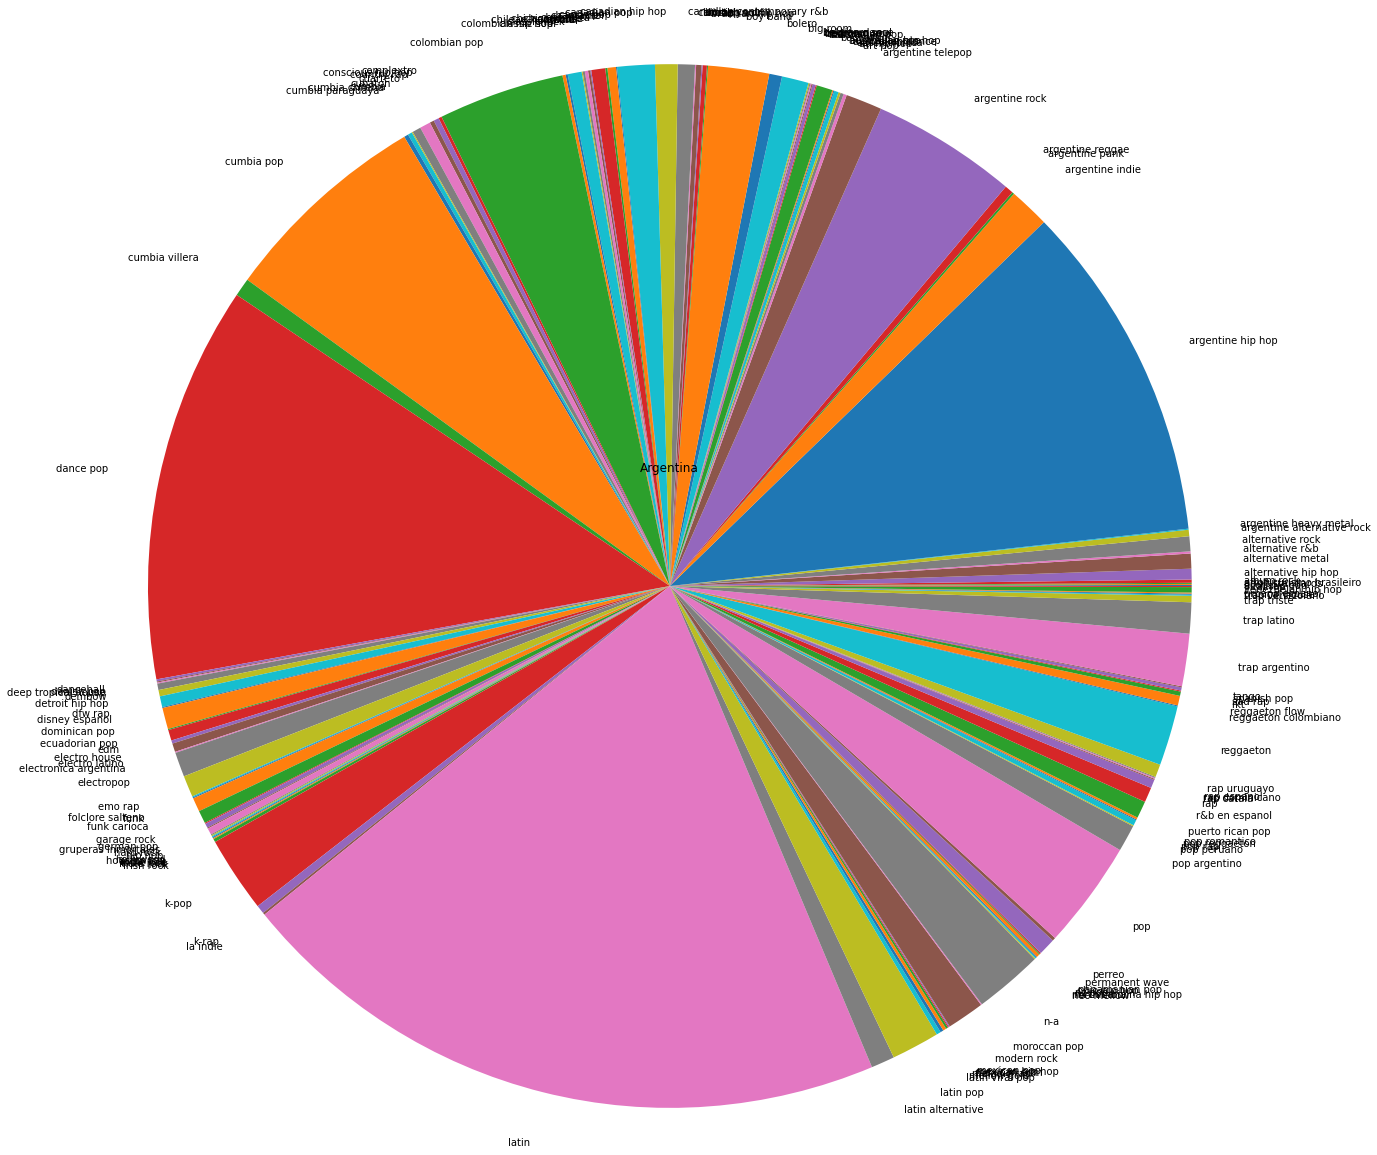

Unique Genres for Argentina:144


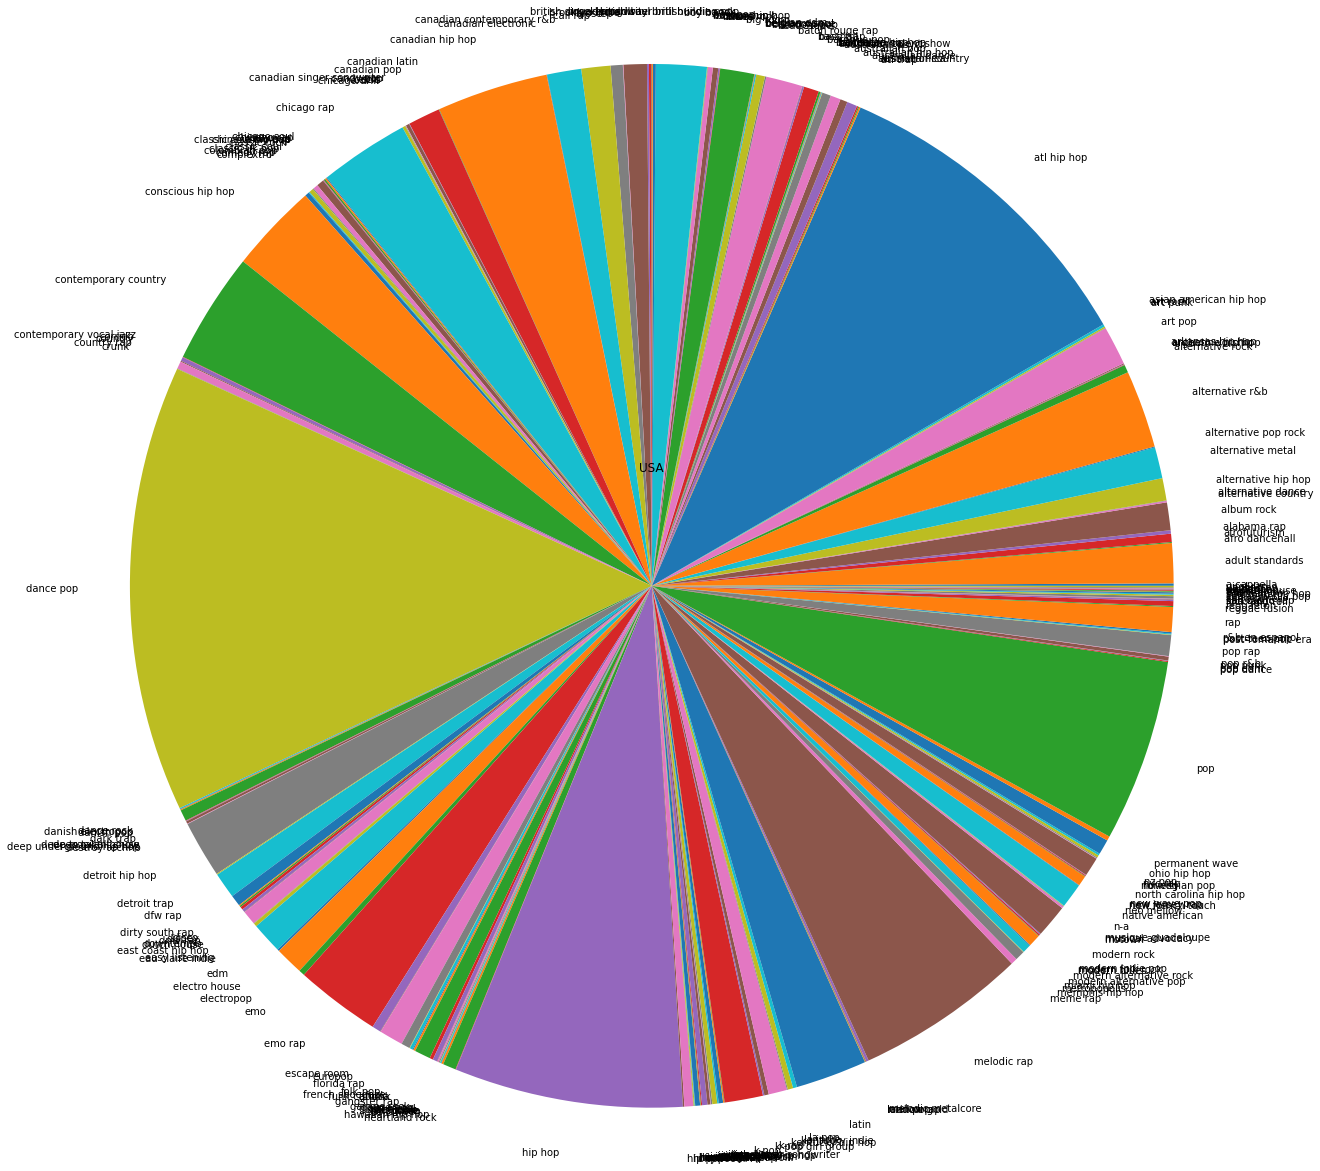

Unique Genres for USA:219


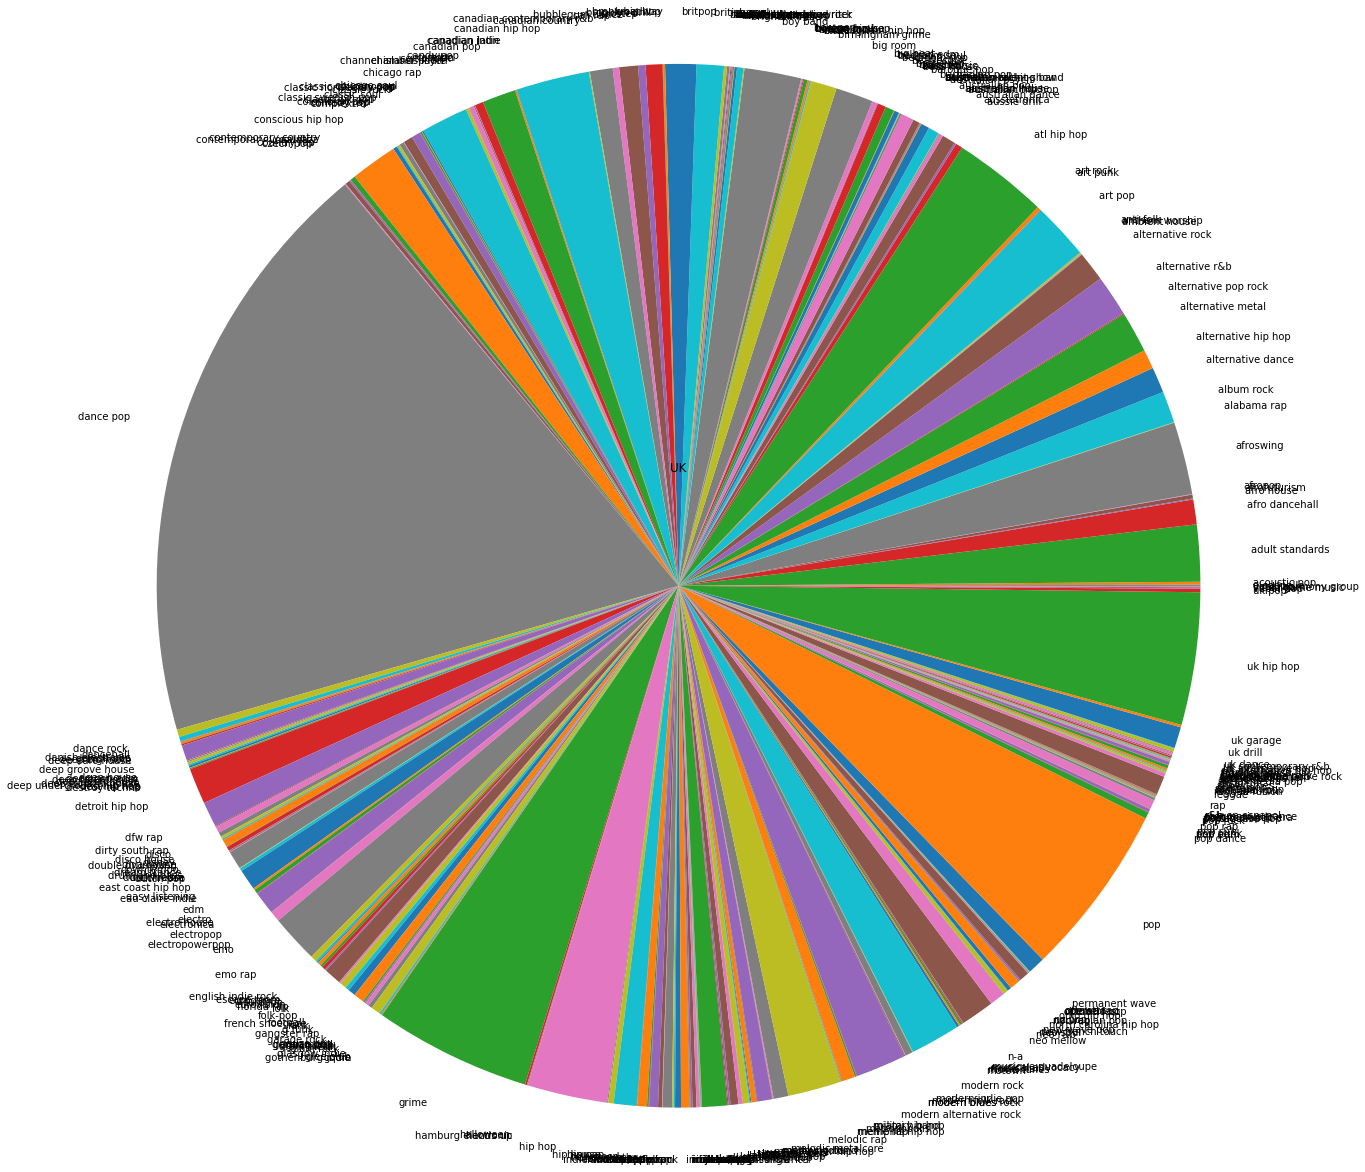

Unique Genres for UK:298


In [38]:
temp_df = df[df.Country.isin(["Argentina"])].groupby("Genre").size()
pd.set_option("display.max_rows", None, "display.max_columns", None)

data = dict(temp_df)

labels = list(data.keys())
values = list(data.values())
    
plt.pie(values, labels=labels, radius = 6)
plt.title("Argentina")
plt.show()
    
print("Unique Genres for Argentina" + ":" + str(len(labels)))


temp_df = df[df.Country.isin(["USA"])].groupby("Genre").size()
pd.set_option("display.max_rows", None, "display.max_columns", None)

data = dict(temp_df)

labels = list(data.keys())
values = list(data.values())
    
plt.pie(values, labels=labels, radius = 6)
plt.title("USA")
plt.show()
    
print("Unique Genres for USA" + ":" + str(len(labels)))


temp_df = df[df.Country.isin(["UK"])].groupby("Genre").size()
pd.set_option("display.max_rows", None, "display.max_columns", None)

data = dict(temp_df)

labels = list(data.keys())
values = list(data.values())
    
plt.pie(values, labels=labels, radius = 6)
plt.title("UK")
plt.show()
    
print("Unique Genres for UK" + ":" + str(len(labels)))

Next, we take a look at the population data. The three main columns we want to focus on are Immigrant Ratio, Median Age, and Urban Population Percentage for each of our 34 countries. We thought it would be good to see how these changed over 2017 to 2020, so we decided to plot a line graph for each of these numbers. For Immigrant Ratio, the general trend for each country is that is seemed to decrease slowly or stay pretty constant over the course of 4 years. Then, for Median Age, most countries stayed cosntant until 2019 and then increased for 2020. Lastly, for Urban Population Percentage, for most countries it either stay constant or slowly increased from 2017 to 2020. 

<AxesSubplot:title={'center':'Urban Pop % for Different Countries 2017-2020'}, xlabel='Year', ylabel='Urban Pop %'>

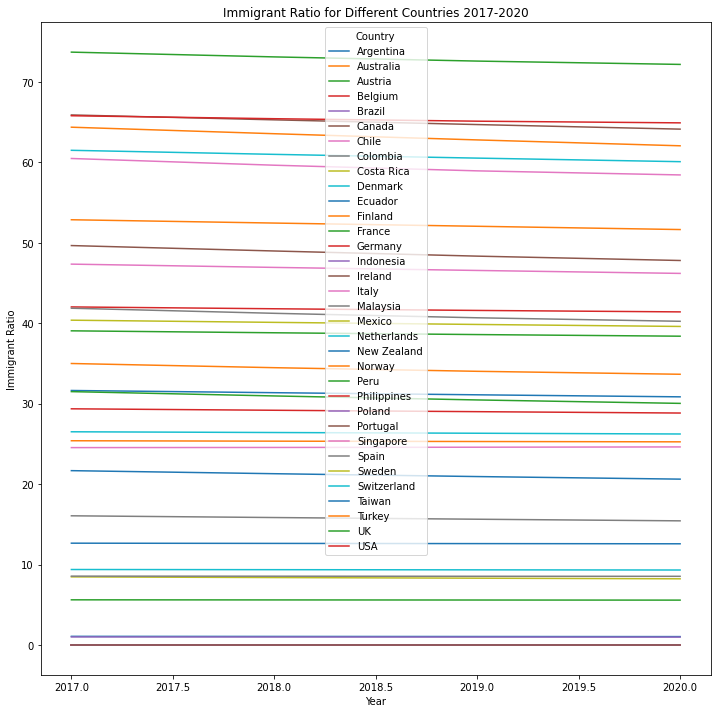

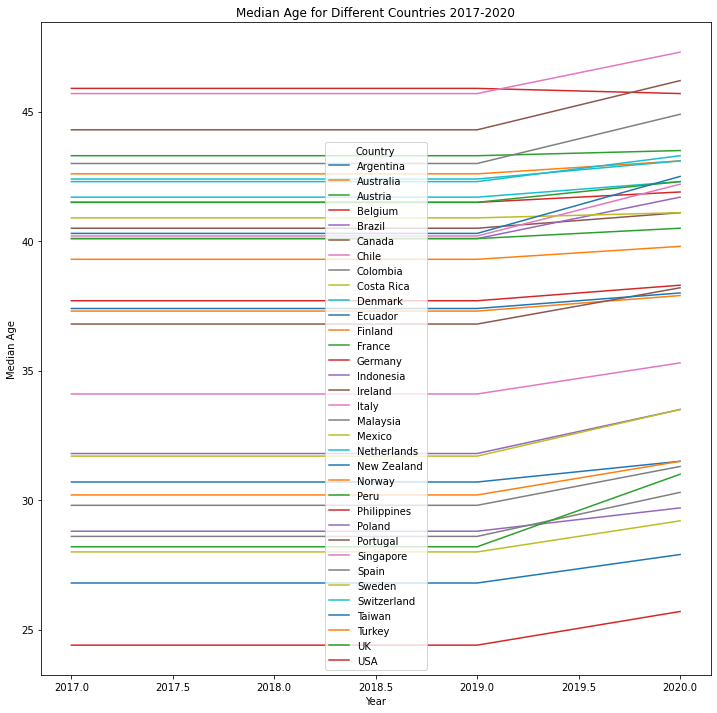

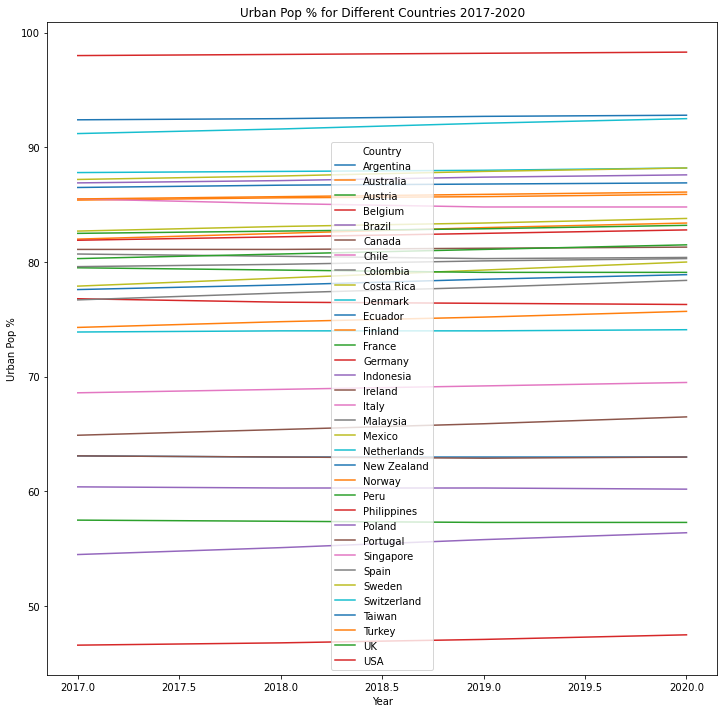

In [39]:
graph = pop_df.pivot(index='Year', columns='Country', values='Immigrant Ratio')
graph.plot(title='Immigrant Ratio for Different Countries 2017-2020', xlabel="Year",ylabel="Immigrant Ratio",figsize=(12,12))

graph = pop_df.pivot(index='Year', columns='Country', values='Median Age')
graph.plot(title='Median Age for Different Countries 2017-2020', xlabel="Year",ylabel="Median Age",figsize=(12,12))

graph = pop_df.pivot(index='Year', columns='Country', values='Urban Pop %')
graph.plot(title='Urban Pop % for Different Countries 2017-2020', xlabel="Year",ylabel="Urban Pop %",figsize=(12,12))


In order to get a count of unique genres in each country, we're need to aggregate our Spotify dataset. First we create a groups for every unique "Country"/"Genre" pair, and then we count the number of times each country appears in that list of groups. This way we count how many unique genres a country has. 

EX:
1) Beginning Dataset
2) Argentina - Pop - 5 songs, Argentina - Rock - 4 songs, Argentina - Rap - 2 songs,
   Australia - Rap - 1, Australia - Funk-2
3) Argentina - 3 genres, Australia - 2 genres

In [40]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)

df = df.groupby(["Country", "Genre"]).count().reset_index()
numUniqG = df.groupby(["Country"]).count().reset_index()
numUniqG

,Country,Genre,Popularity,Title,Artist,Album/Single,Artist_followers,Album
0,Argentina,144,144,144,144,144,144,144
1,Australia,216,216,216,216,216,216,216
2,Austria,293,293,293,293,293,293,293
3,Belgium,278,278,278,278,278,278,278
4,Brazil,140,140,140,140,140,140,140
...,...,...,...,...,...,...,...,...
29,Switzerland,290,290,290,290,290,290,290
30,Taiwan,301,301,301,301,301,301,301
31,Turkey,186,186,186,186,186,186,186
32,UK,298,298,298,298,298,298,298


Now we have our unique genre dataset compiled, so lets make the other tables we'll need to test our variables correlation. First, we can isolate each country and its Immigrant Ratio before taking the average of that Immigrant Ratio over the 4 year span. Here are the results:

In [41]:
avg_im = pop_df[["Country", "Migrants (net)", "Immigrant Ratio"]].groupby("Country").mean().reset_index()
avg_im

,Country,Migrants (net),Immigrant Ratio
0,Argentina,4800.0,1.077109
1,Australia,158246.0,63.192703
2,Austria,65000.0,72.889164
3,Belgium,48000.0,41.712401
4,Brazil,21200.0,1.008500
...,...,...,...
29,Switzerland,52000.0,60.774577
30,Taiwan,30001.0,12.633173
31,Turkey,283922.0,34.294769
32,UK,260650.0,38.718894


We can repeat this process of isolating a varaible and taking its average over the 4 years for the next 2 variables.

In [42]:
med_age = pop_df[["Country", "Median Age"]].groupby("Country").mean().reset_index()
med_age

,Country,Median Age
0,Argentina,30.900
1,Australia,37.450
2,Austria,43.350
3,Belgium,41.600
4,Brazil,32.225
...,...,...
29,Switzerland,42.575
30,Taiwan,40.850
31,Turkey,30.525
32,UK,40.200


Note: Singapore is in line 26 and does not have data for its urban population, so we need to drop it.

In [43]:
urb_pop = pop_df[["Country", "Urban Pop %"]].groupby("Country").mean().reset_index()
urb_pop.drop(26, inplace=True)
urb_pop

,Country,Urban Pop %
0,Argentina,92.600
1,Australia,85.650
2,Austria,57.375
3,Belgium,98.150
4,Brazil,87.250
...,...,...
29,Switzerland,74.000
30,Taiwan,78.250
31,Turkey,75.000
32,UK,82.825


Since we have the average of each variable over the course of the 4 years for each of the 34 countries, we made bar graphs for Immigrant Ratio, Median Age, and Urban Population Percentage to comapare each countries numbers with each other. 

<AxesSubplot:title={'center':'Average Urban Population Percentage between 2017-2020 for each Country'}, xlabel='Country'>

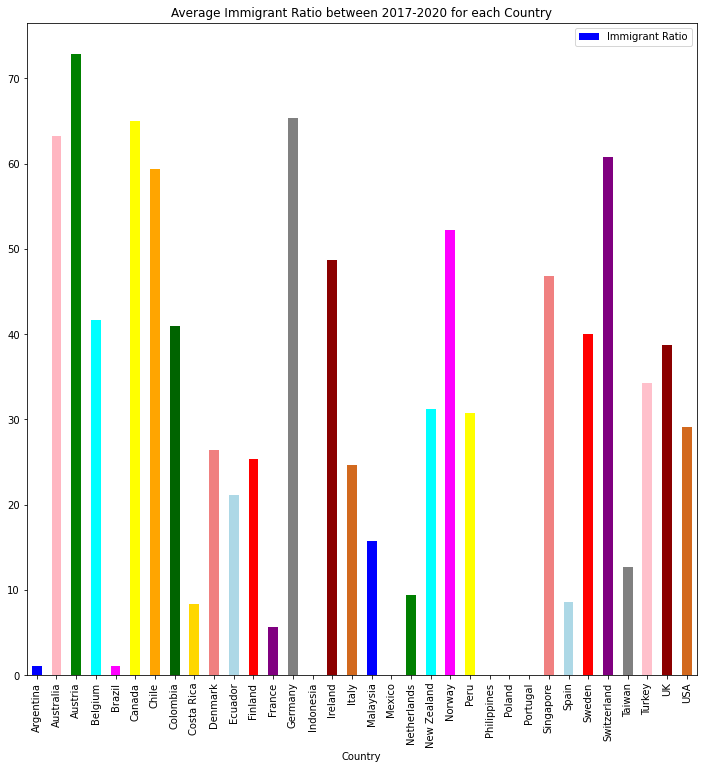

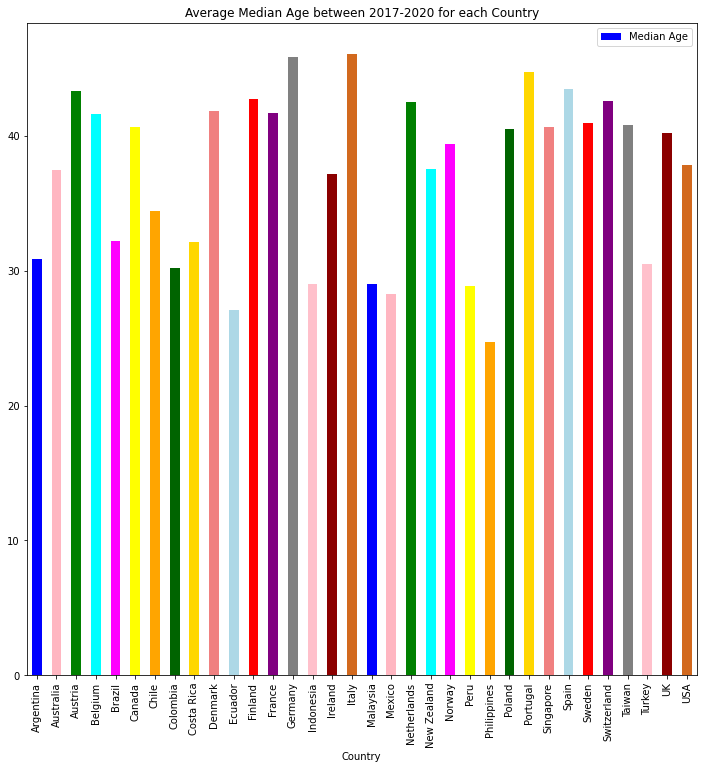

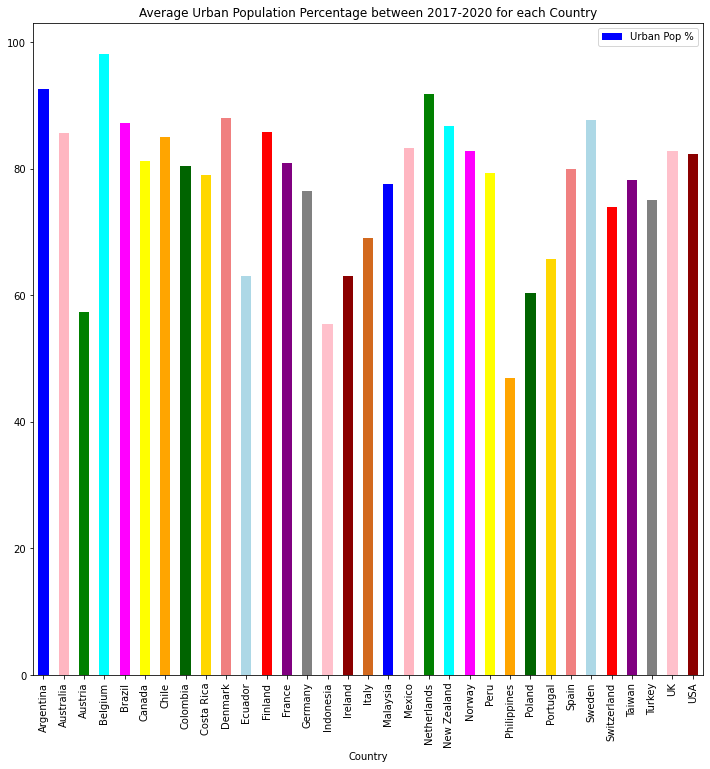

In [44]:
colors = ["blue", "lightpink", "green", "cyan", "magenta", "yellow", "orange", "darkgreen", "gold", "lightcoral", "lightblue", "red", "purple", "grey", "pink", "darkred", "chocolate", "blue", "lightpink", "green", "cyan", "magenta", "yellow", "orange", "darkgreen", "gold", "lightcoral", "lightblue", "red", "purple", "grey", "pink", "darkred", "chocolate"]

avg_im.plot.bar(x="Country", y="Immigrant Ratio", title="Average Immigrant Ratio between 2017-2020 for each Country", figsize=(12,12), color=colors)
med_age.plot.bar(x="Country", y="Median Age", title="Average Median Age between 2017-2020 for each Country", figsize=(12,12), color=colors)
urb_pop.plot.bar(x="Country", y="Urban Pop %", title="Average Urban Population Percentage between 2017-2020 for each Country", figsize=(12,12), color=colors)

## Testing Regression

Let’s see if there is any correlation between our variables of interest, and the number of unique genres a country listens too! We can start with Immigrant Ratio, and make a scatter plot where each point is a country whose x-position represents their immigrant ratio, and whose y-positino represents the number of unique genres they have.

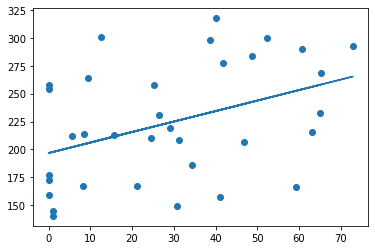

In [45]:
x=avg_im["Immigrant Ratio"]
y=numUniqG["Genre"]
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

The scatter plot and regression line don’t inspire too much confidence about correlation between the two, but lets check the correlation coeﬀicients just to quantify our thoughts.

In [46]:
headers = ["Immigrant Ratio", "Genre"]
r = pd.concat([x, y], axis=1, keys=headers)

reg = smf.ols("Q('Genre') ~ Q('Immigrant Ratio')", data = r).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q('Genre')   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     6.414
Date:                Mon, 20 Dec 2021   Prob (F-statistic):             0.0164
Time:                        20:02:16   Log-Likelihood:                -179.83
No. Observations:                  34   AIC:                             363.7
Df Residuals:                      32   BIC:                             366.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              196.6094     13.704     14.347      0.000     168.695     224.523
Q('Immigrant Ratio')     0.9453      0.373      2.533      0.016       0.185       1.706
==============================================================================
Omnibus:                        2.876   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.418
Skew:                           0.082   Prob(JB):                        0.492
Kurtosis:                       2.013   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unfortunately, with an R-squared value of 0.167, the two variables seems to have a very weak correlation. Let’s try with another variable!(Median Age)

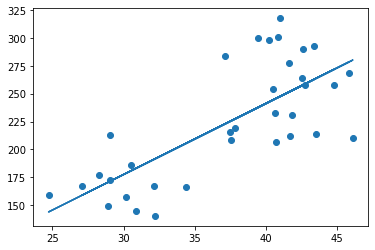

In [47]:
x=med_age["Median Age"]
y=numUniqG["Genre"]
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

Intresting! This set of points seems to follow a linear trend much closer than the last set did. The scatter plot seems to say that there is a positive correlation between Median Age and Number of Unique Genres. Let’s check the statistics on that too.

In [48]:
headers = ["Median Age", "Genre"]
r = pd.concat([x, y], axis=1, keys=headers)

reg = smf.ols("Q('Genre') ~ Q('Median Age')", data = r).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q('Genre')   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     38.23
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           6.39e-07
Time:                        20:02:16   Log-Likelihood:                -169.57
No. Observations:                  34   AIC:                             343.1
Df Residuals:                      32   BIC:                             346.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.7264     39.095     -0.377      0.709     -94.359      64.907
Q('Median Age')     6.4018      1.035      6.183      0.000       4.293       8.511
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                1.008
Skew:                           0.263   Prob(JB):                        0.604
Kurtosis:                       2.340   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A R-Squared score of .544 is far better than before, and indicates a real correlation between the two variables. Lets look at our last variable.(Urban Population %)

Note: We have to drop the 26th row because Singapore has NaN listed for their Urban Pop %

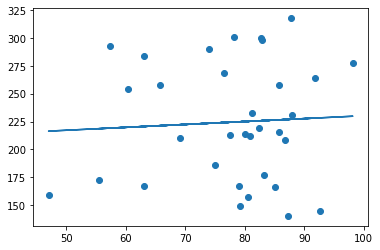

In [49]:
temp=numUniqG.drop(26)
x=urb_pop["Urban Pop %"]
y=temp["Genre"]
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

This doesn’t look too promising either. Lets look at the summary of the two variable’s relationship.

In [50]:
headers = ["Urban Pop %", "Genre"]
r = pd.concat([x, y], axis=1, keys=headers)

reg = smf.ols("Q('Genre') ~ Q('Urban Pop %')", data = r).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q('Genre')   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1000
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.754
Time:                        20:02:16   Log-Likelihood:                -177.94
No. Observations:                  33   AIC:                             359.9
Df Residuals:                      31   BIC:                             362.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          204.0200     65.118      3.133      0.004      71.211     336.829
Q('Urban Pop %')     0.2623      0.829      0.316      0.754      -1.429       1.954
==============================================================================
Omnibus:                        7.656   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.182
Skew:                           0.053   Prob(JB):                        0.336
Kurtosis:                       1.745   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A score of .003, means we are pretty safe to assume that there is absolutely no correlation between Urban Population % and Number of Unique Genres.

## Conclusion

Looking at all 3 scores as a whole, it seems like the only relevant variable in predicting a countries muscial diversity might be their Median Age. However, the results show a positive correlation between Median age and Number of Unique Genres, the opposite of what we predicted at the beginning of our exploration. What could this mean? It’s possible that our hypothesis was incorrect, and that maybe older people actually have more diverse music taste than younger people. A more likely explanation though is that there is a confounding variable, something that both Median Age and Number of Unique Genres positively correlate with. Its possible that countries with higher median ages are more developed and see more interation with other cultures through more traﬀic in and out of their country. It’s also possible that a higher median age means more grown-ups who are willing to buy Spotify subscriptions, and listen to unique genres. Any numebr of things could explain the correlation between the two, and the answer will be a little vague until we can do more analysis. However, we can be confident in answering our hypothesis that: Urban Population Percentage and Immigrant Ratio are poor indicators of the number of unique music genres a country listens too, and that Median Age seems to be positivly correlated with the number of unique genres. Maybe in the future, we can exlpore the reason behind the correlation we found, or look for other indicators that predict genre diversity better. 